In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
import collections
from pylab import meshgrid


%matplotlib inline

class FIELD(Enum):      
        ELECTRIC = [1,['e_0', 'e_1', 'e_2']]
        CURRENT = [1,['jaux_0', 'jaux_1', 'jaux_2']]
        VELOCION = [1,['vi_0', 'vi_1', 'vi_2']]
        DENSELEC = [1,['ne_0']]
        PRESSURE = [1,['pe_0', 'pe_1', 'pe_2','pe_3', 'pe_4', 'pe_5']]
        DENSITY = [1,['nv1_0']]
        VELOCITY = [1,['nv1_1', 'nv1_2', 'nv1_3']]
        DENSITY1 = [1,['nv2_0']]
        VELOCITY1 = [1,['nv2_1', 'nv2_2', 'nv2_3']]
        DENSITY2 = [1,['nv3_0']]
        VELOCITY2 = [1,['nv3_1', 'nv3_2', 'nv3_3']]
        MAGNETIC = [1,['b_0', 'b_1', 'b_2']]
    

                    
def loadData(filePath):           
        f = h5py.File(filePath, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        for fld in FIELD:
                VAR0_name = 'vars/'+fld.value[1][0]
                SHAPE = f[VAR0_name].shape            
                Lx=SHAPE[0]
                Ly=SHAPE[1]
                Lz=SHAPE[2]
                data = np.zeros([Lx, Ly, Lz,  6])
                idx = 0
                for field in fld.value[1]:
                    VAR_name = 'vars/'+field
                    data[...,idx] = f[VAR_name][...]
                    idx += 1
                    allData[fld] = data                   
        f.close()
        return allData
        
        
def loadVar(filePath, fld):           
        f = h5py.File(filePath, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        VAR0_name = 'vars/'+fld.value[1][0]
        SHAPE = f[VAR0_name].shape    
        Lx=SHAPE[0]
        Ly=SHAPE[1]
        Lz=SHAPE[2]
        data = np.zeros([Lx, Ly, Lz, len(fld.value[1])])
        idx = 0
        for field in fld.value[1]:
            VAR_name = 'vars/'+field
            data[...,idx] = f[VAR_name]
            idx += 1
            
        f.close()
        return data
    
def loadVarComp(filePath, fld, comp):           
        f = h5py.File(filePath, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        VAR0_name = 'vars/'+fld.value[1][0]
        SHAPE = f[VAR0_name].shape    
        Lx=SHAPE[0]
        Ly=SHAPE[1]
        Lz=SHAPE[2]
        data = np.zeros([Lx, Ly, Lz])
        VAR_name = 'vars/'+fld.value[1][comp]
        data[...] = f[VAR_name]
            
        f.close()
        return data 
    

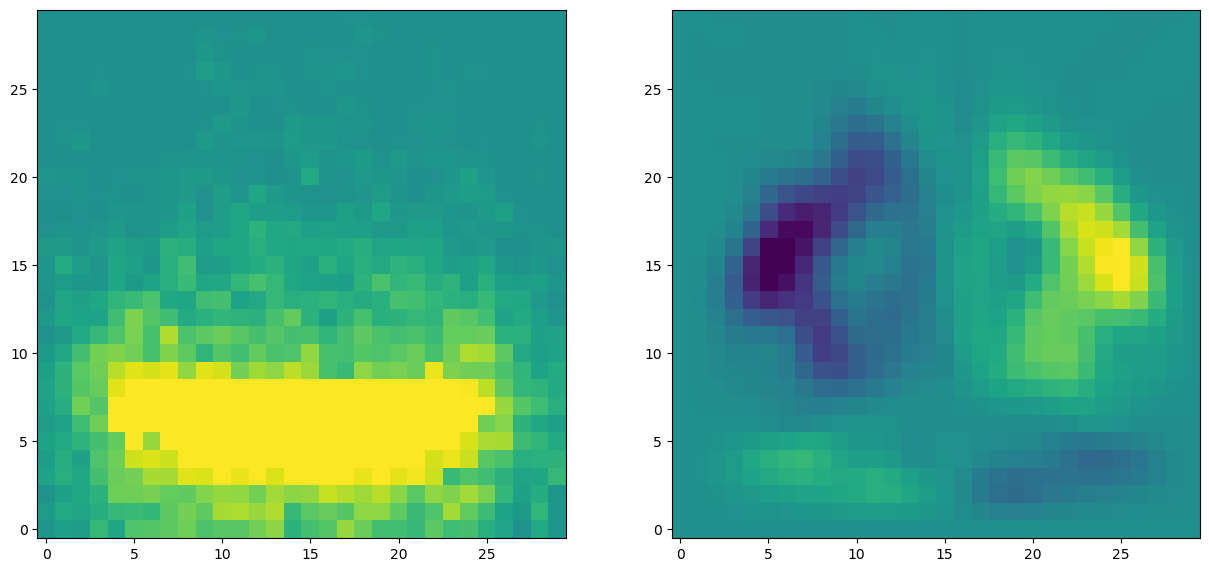

In [4]:
filePath = '../AKA/output/'
fileName = 'free_3D_10.h5'

fig, ax = plt.subplots(1,2, figsize = [15, 8], dpi = 100) 

data2Plt = loadVarComp(filePath+fileName, FIELD.DENSITY2, 0)
[lx, ly, lz] = data2Plt.shape

lx2 = int(0.5*lx)
vmax = 1
ax[0].imshow( np.transpose(data2Plt[lx2,...]), origin = 'lower', vmin = -vmax, vmax = vmax)

data2Plt = loadVarComp(filePath+fileName, FIELD.MAGNETIC,0)
vmax = 0.4
ax[1].imshow( np.transpose(data2Plt[lx2,...]), origin = 'lower', vmin = -vmax, vmax = vmax)


